# Table of Contents
1. [Install Packages](#install-packages)
2. [Variable Settings](#var-settings)
3. [Kaggle Setup](#kaggle-setup)
4. [Data Loading](#data-loading)
5. [Exploratory Data Analysis (EDA)](#eda)
6. [Preprocessing](#preprocessing)
7. [Training](#training)
8. [Inference](#inference)
9. [Model Evaluation](#model-evaluation)


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="install-packages"></a>Install Packages</p>

In [2]:
# Install Packages
import subprocess

def install_package(package_name, extra_command=None):
    """
    Install a Python package using pip and return 'Success' or 'Fail' message.
    
    Args:
        package_name (str): The name of the package to install.
        extra_command (str, optional): Extra commands to add to the pip install command.
    
    Returns:
        str: 'Success' if the package was successfully installed, 'Fail' otherwise.
    """
    try:
        cmd = f"pip install {package_name} {extra_command}"
        result = subprocess.run(cmd, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True, text=True)
        if result.returncode == 0:
            return 'Success'
        else:
            return 'Fail'
    except Exception as e:
        return 'Fail'

packages_to_install = [
    'textstat',
    'nltk',
    'gensim',
    'pyLDAvis',
    'seaborn',
    'textblob',
    'spacy',
    'pyspellchecker',
    'keras_tuner',
    'tensorflow',
    'kaggle',
    'transformers',
    'datasets',
    'textstat',
]

for package in packages_to_install:
    print(f"Installing {package}: {install_package(package)}")


Installing textstat: Success
Installing nltk: Success
Installing gensim: Success
Installing pyLDAvis: Success
Installing seaborn: Success
Installing textblob: Success
Installing spacy: Success
Installing pyspellchecker: Success
Installing keras_tuner: Success
Installing tensorflow: Success
Installing kaggle: Success
Installing transformers: Success
Installing datasets: Success
Installing textstat: Success


In [14]:
import os
import logging
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Natural Language Processing
import nltk

# Download NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag, ne_chunk
from textblob import TextBlob
# from textstat import flesch_reading_ease, smog_index
import spacy
from collections import Counter
from gensim import corpora, models
import pyLDAvis.gensim as gen
import pyLDAvis
import re

# Machine Learning & Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Deep Learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Gensim
from gensim.models import Word2Vec, KeyedVectors

# Progress bar
from tqdm import tqdm

# Keras Tuner
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

# Setting logging levels and environment variables
tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from textstat import flesch_reading_ease


[nltk_data] Downloading package punkt to /home/jack/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jack/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="var-settings"></a>Variable Settings</p>

In [3]:
# Variable Settings
competition_name = "commonlit-evaluate-student-summaries"


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="kaggle-setup"></a>Kaggle Setup</p>

In [9]:
import os

def download_dataset():
    """
    Download a dataset from Kaggle.
    """
    # Download the dataset
    os.system(f'kaggle competitions download -c {competition_name}')

def unzip_dataset():
    """
    Unzip the dataset and display a message indicating success or failure.
    """
    # List all files in the current directory
    files = os.listdir()

    # Find the first zip file in the directory
    zip_file = next((file for file in files if file.endswith('.zip')), None)

    if zip_file is None:
        print("No zip file found in the current directory.")
        return

    # Unzip the dataset while suppressing output
    if os.system(f'unzip {zip_file} > /dev/null 2>&1') == 0:
        print("Inflating successful.")
    else:
        print("Inflating failed.")

if __name__ == "__main__":
    download_dataset()
    unzip_dataset()


commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)
Inflating successful.


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="data-loading"></a>Data Loading</p>

In [12]:
# Data Loading
# Placeholder for data loading code
summaries_train = pd.read_csv('/home/jack/github/CommonLit/summaries_train.csv')
prompts_train = pd.read_csv('/home/jack/github/CommonLit/prompts_train.csv')
print('length of summaries_train:', len(summaries_train))
print('length of prompts_train:',len(prompts_train),'\n')

summaries_test = pd.read_csv('/home/jack/github/CommonLit/summaries_test.csv')
prompts_test = pd.read_csv('/home/jack/github/CommonLit/prompts_test.csv')
sample_submission = pd.read_csv('/home/jack/github/CommonLit/sample_submission.csv')
print('length of summaries_test:', len(summaries_test))
print('length of prompts_test:',len(prompts_test))
print('length of sample_submission:',len(sample_submission))

length of summaries_train: 7165
length of prompts_train: 4 

length of summaries_test: 4
length of prompts_test: 2
length of sample_submission: 4


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="eda"></a>Exploratory Data Analysis (EDA)</p>

In [16]:
# Exploratory Data Analysis (EDA)
warnings.filterwarnings('ignore', category=UserWarning, module='scipy')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

from math import ceil

def preprocess(texts, batch_size=1000):
    """
    Preprocesses a given series of texts by tokenizing, converting to lowercase,
    and removing stopwords and non-alphanumeric words. Uses batching to avoid IOPub message rate exceeded error.
    
    Args:
        texts (pd.Series): Series of texts to preprocess.
        batch_size (int): Number of documents to process in each batch.
        
    Returns:
        pd.Series: Preprocessed texts.
    """
    # Calculate the number of batches
    num_batches = ceil(len(texts) / batch_size)
    
    # Initialize an empty list to hold the preprocessed texts
    preprocessed_texts = []
    
    for i in tqdm(range(num_batches), desc='Batch Processing', leave=False):
        # Extract the texts for the current batch
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_texts = texts.iloc[start_idx:end_idx]
        
        # Preprocess the texts in the current batch
        preprocessed_batch = batch_texts.apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalnum() and word not in stop_words])
        
        # Append the preprocessed texts to the list
        preprocessed_texts.extend(preprocessed_batch)
        
    return pd.Series(preprocessed_texts)


def topic_modeling(texts, num_topics=5):
    """
    Perform topic modeling using LDA.
    """
    dictionary = corpora.Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in tqdm(texts, desc='Creating corpus', leave=False)]
    lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    lda_display = gen.prepare(lda_model, corpus, dictionary)
    return lda_display

def sentiment_analysis(texts):
    """
    Perform sentiment analysis on the text using TextBlob.
    """
    return texts.apply(lambda x: TextBlob(x).sentiment.polarity)

def text_complexity(texts):
    """
    Calculate the Flesch Reading Ease score of the text using textstat.
    """
    return texts.apply(lambda x: flesch_reading_ease(x))


# Preprocess the text in the summaries and prompts
print("Preprocessing text in summaries...")
summaries_processed = preprocess(summaries_train['text'])
print("Preprocessing text in prompts...")
prompts_processed = preprocess(prompts_train['prompt_text'])

# Perform topic modeling on both summaries and prompts
print("Performing topic modeling on summaries...")
lda_display_summaries = topic_modeling(summaries_processed)
print("Performing topic modeling on prompts...")
lda_display_prompts = topic_modeling(prompts_processed)

# Perform sentiment analysis on summaries and prompts
print("Performing sentiment analysis on summaries...")
summaries_train['sentiment'] = sentiment_analysis(summaries_train['text'])
print("Performing sentiment analysis on prompts...")
prompts_train['sentiment'] = sentiment_analysis(prompts_train['prompt_text'])

# Calculate text complexity for summaries and prompts
print("Calculating text complexity for summaries...")
summaries_train['flesch_score'] = text_complexity(summaries_train['text'])
print("Calculating text complexity for prompts...")
prompts_train['flesch_score'] = text_complexity(prompts_train['prompt_text'])


Preprocessing text in summaries...


Preprocessing text in prompts...


Performing topic modeling on summaries...


Performing topic modeling on prompts...


Performing sentiment analysis on summaries...


Performing sentiment analysis on prompts...
Calculating text complexity for summaries...
Calculating text complexity for prompts...



 Preparing Visualizations.....


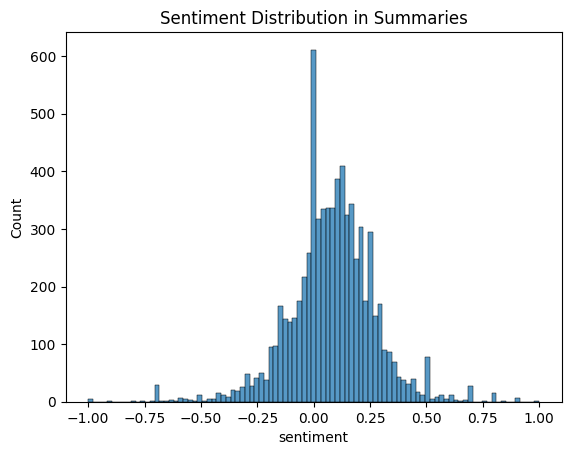

In [19]:
print('\n Preparing Visualizations.....')

# Visualize sentiment and text complexity using histograms
sns.histplot(summaries_train['sentiment']).set_title('Sentiment Distribution in Summaries')
plt.show()


 Preparing Visualizations.....


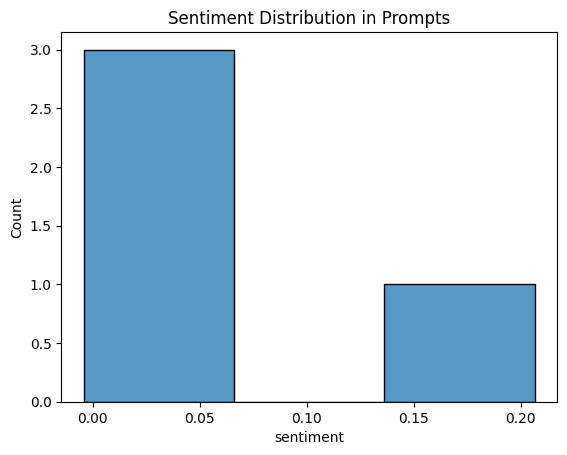

In [20]:
print('\n Preparing Visualizations.....')

sns.histplot(prompts_train['sentiment']).set_title('Sentiment Distribution in Prompts')
plt.show()


 Preparing Visualizations.....


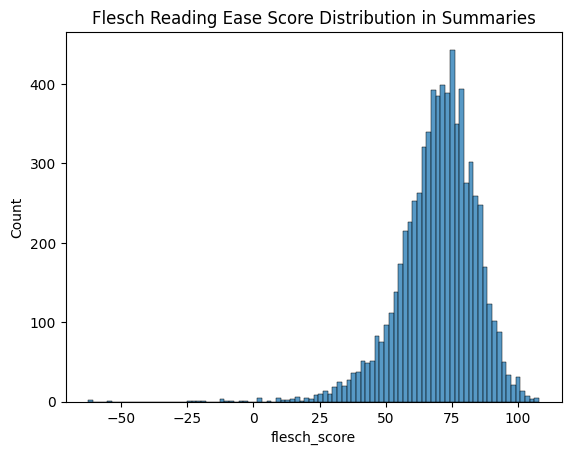

In [21]:
print('\n Preparing Visualizations.....')

sns.histplot(summaries_train['flesch_score']).set_title('Flesch Reading Ease Score Distribution in Summaries')
plt.show()



 Preparing Visualizations.....


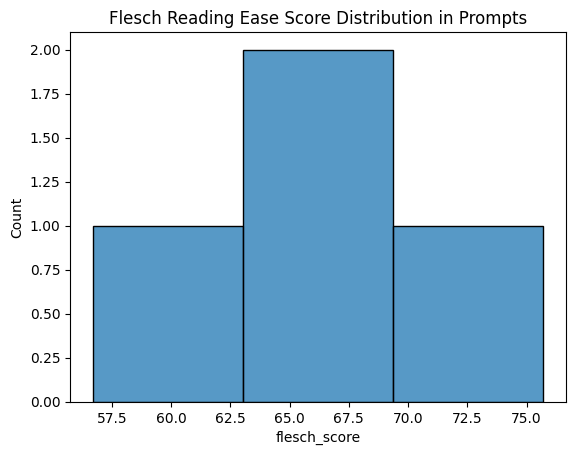

In [22]:
print('\n Preparing Visualizations.....')

sns.histplot(prompts_train['flesch_score']).set_title('Flesch Reading Ease Score Distribution in Prompts')
plt.show()


 Preparing Visualizations.....


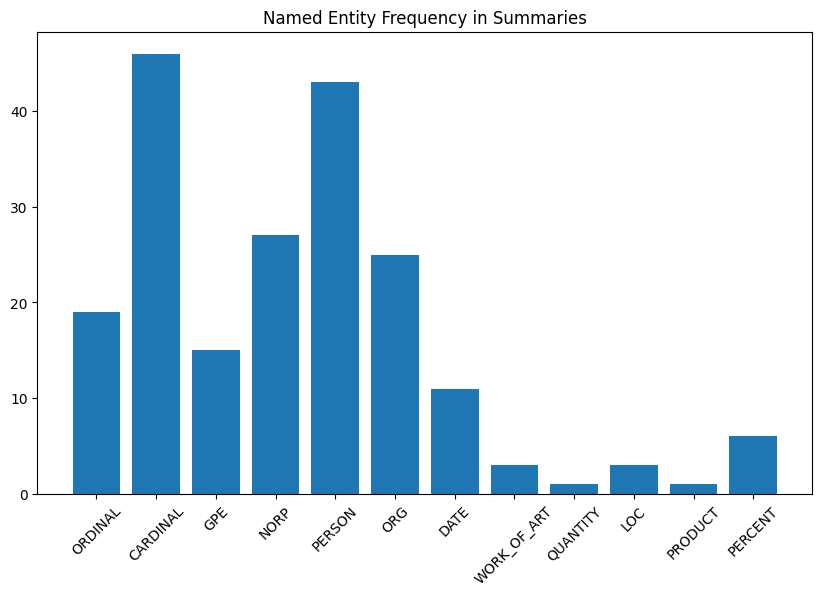

In [24]:
# Named Entity Recognition (Limiting to first 100 rows for demonstration)
nlp = spacy.load("en_core_web_sm")
texts_summaries = ' '.join(summaries_train['text'][:100])
texts_prompts = ' '.join(prompts_train['prompt_text'][:100])
doc_summaries = nlp(texts_summaries)
doc_prompts = nlp(texts_prompts)

print('\n Preparing Visualizations.....')

# Count the frequencies of named entity types in summaries and prompts
entity_freq_summaries = Counter([ent.label_ for ent in doc_summaries.ents])
entity_freq_prompts = Counter([ent.label_ for ent in doc_prompts.ents])

# Visualize named entity frequencies
plt.figure(figsize=(10, 6))
plt.bar(entity_freq_summaries.keys(), entity_freq_summaries.values())
plt.title('Named Entity Frequency in Summaries')
plt.xticks(rotation=45)
plt.show()


 Preparing Visualizations.....


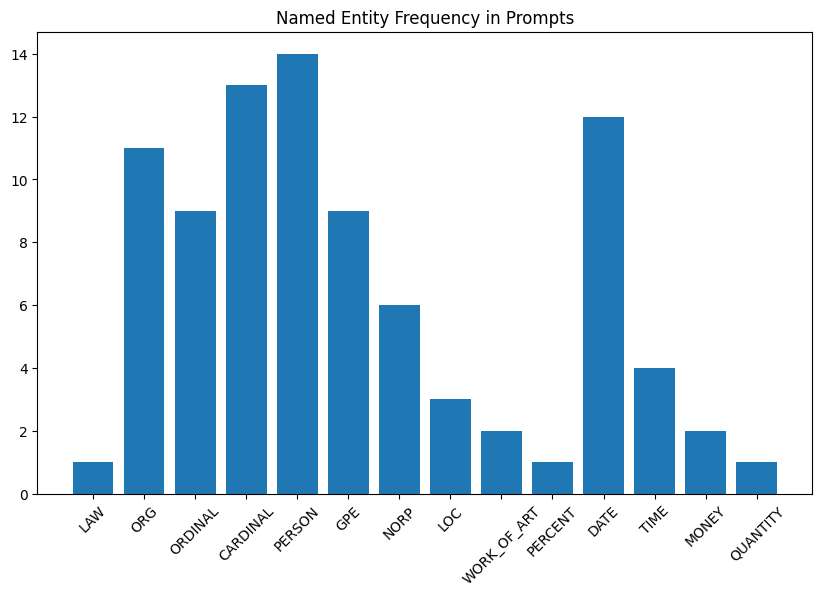

In [25]:
print('\n Preparing Visualizations.....')

plt.figure(figsize=(10, 6))
plt.bar(entity_freq_prompts.keys(), entity_freq_prompts.values())
plt.title('Named Entity Frequency in Prompts')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Data Loading
# Placeholder for data loading code
summaries_train = pd.read_csv('/home/jack/github/CommonLit/summaries_train.csv')
prompts_train = pd.read_csv('/home/jack/github/CommonLit/prompts_train.csv')
print('length of summaries_train:', len(summaries_train))
print('length of prompts_train:',len(prompts_train),'\n')

summaries_test = pd.read_csv('/home/jack/github/CommonLit/summaries_test.csv')
prompts_test = pd.read_csv('/home/jack/github/CommonLit/prompts_test.csv')
sample_submission = pd.read_csv('/home/jack/github/CommonLit/sample_submission.csv')
print('length of summaries_test:', len(summaries_test))
print('length of prompts_test:',len(prompts_test))
print('length of sample_submission:',len(sample_submission))

length of summaries_train: 7165
length of prompts_train: 4 

length of summaries_test: 4
length of prompts_test: 2
length of sample_submission: 4


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="preprocessing"></a>Preprocessing</p>

In [27]:
# Preprocessing
import numpy as np
import pandas as pd
import operator
from spellchecker import SpellChecker
from tqdm import tqdm  # Import tqdm

def clean_text(df, glove_path, paragram_path, wiki_news_path, col_name = 'text'):
    """
    Preprocesses text for both training and testing datasets. 
    Includes loading embeddings, building vocabularies, cleaning text among other things.
    
    :param summaries_train: DataFrame with the training data
    :param summaries_test: DataFrame with the testing data
    :param glove_path: path to the GloVe embedding
    :param paragram_path: path to the Paragram embedding
    :param wiki_news_path: path to the Wiki News embedding
    
    :return: Preprocessed DataFrame and list of out-of-vocab words
    """
    print("Starting text cleaning process.")
    
    def load_embed(file):
        """
        Load the embeddings from a file.
        """
        print(f"Loading embeddings from {file}")
        
        def get_coefs(word, *arr): 
            return word, np.asarray(arr, dtype='float32')
        
        if file == wiki_news_path:
            embeddings_index = dict(get_coefs(*o.split(" ")) for o in tqdm(open(file), "Reading Embedding File") if len(o)>100)
        else:
            embeddings_index = dict(get_coefs(*o.split(" ")) for o in tqdm(open(file, encoding='latin'), "Reading Embedding File"))
        
        print(f"Loaded embeddings from {file}")
        return embeddings_index

    # Load embeddings
    print("Loading all embeddings.")
    embed_glove = load_embed(glove_path)
    embed_paragram = load_embed(paragram_path)
    embed_fasttext = load_embed(wiki_news_path)
    print("All embeddings loaded.")
    
    def build_vocab(texts):
        """
        Build a vocabulary from a given list of texts.
        """
        print("Building vocabulary.")
        sentences = texts.apply(lambda x: x.split()).values
        vocab = {}
        for sentence in tqdm(sentences, "Populating Vocabulary"):
            for word in sentence:
                try:
                    vocab[word] += 1
                except KeyError:
                    vocab[word] = 1
        print("Vocabulary built.")
        return vocab

    def check_coverage(vocab, embeddings_index):
        """
        Check which words in the vocabulary are covered by the embeddings.
        """
        print("Checking coverage.")
        known_words = {}
        unknown_words = {}
        nb_known_words = 0
        nb_unknown_words = 0
        for word in tqdm(vocab.keys(), "Checking Words"):
            try:
                known_words[word] = embeddings_index[word]
                nb_known_words += vocab[word]
            except:
                unknown_words[word] = vocab[word]
                nb_unknown_words += vocab[word]
                pass
        unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]
        print("Coverage checked.")
        return unknown_words

    # Build and check vocab for train and test datasets
    print("Processing train and test datasets.")
    
    vocab_train = build_vocab(df[col_name])
    
    oov_glove_train = check_coverage(vocab_train, embed_glove)
    oov_paragram_train = check_coverage(vocab_train, embed_paragram)
    oov_fasttext_train = check_coverage(vocab_train, embed_fasttext)
  
    print("Processed train and test datasets.")
    
    # Lowercase all texts
    df['lowered_question'] = df[col_name].apply(lambda x: x.lower())
    
    train_vocab_low = build_vocab(df['lowered_question'])
    
    oov_glove_train = check_coverage(train_vocab_low, embed_glove)
    oov_paragram_train = check_coverage(train_vocab_low, embed_paragram)
    oov_fasttext_train = check_coverage(train_vocab_low, embed_fasttext)
 
    
    def add_lower(embedding, vocab):
        count = 0
        for word in vocab:
            if word in embedding and word.lower() not in embedding:  
                embedding[word.lower()] = embedding[word]
                count += 1
    
    add_lower(embed_glove, train_vocab_low)
    add_lower(embed_paragram, train_vocab_low)
    add_lower(embed_fasttext, train_vocab_low)
   
    
    # Handle contractions
    contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", 
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", 
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", 
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is",
                           "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have",
                           "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", 
                           "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                           "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are",
                           "y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", 
                           "you're": "you are", "you've": "you have" }
    
    
    def clean_contractions(text, mapping):
        """
        Replace contractions in the text based on a given mapping.
        
        :param text: The original text
        :param mapping: Dictionary containing contractions mapping
        
        :return: Text with contractions replaced
        """
        
        specials = ["’", "‘", "´", "`"]
        
        for s in specials:
            text = text.replace(s, "'")
        text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
        return text

    # Apply contraction cleaning to train and test datasets
    df['cleaned_text'] = df['lowered_question'].apply(lambda x: clean_contractions(x, contraction_mapping))
    
    # Rebuild and check vocab after cleaning contractions
    vocab_train_clean = build_vocab(df['cleaned_text'])
    
    oov_glove_train = check_coverage(vocab_train_clean, embed_glove)
    oov_paragram_train = check_coverage(vocab_train_clean, embed_paragram)
    oov_fasttext_train = check_coverage(vocab_train_clean, embed_fasttext)
    
     # Add your additional code for punctuations, special characters and spelling correction here
        
    punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
    
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                     "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                     'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

    def clean_special_chars(text, punct, mapping):
        for p in mapping:
            text = text.replace(p, mapping[p])
        for p in punct:
            text = text.replace(p, f' {p} ')
        specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
        for s in specials:
            text = text.replace(s, specials[s])
        return text

    df['treated_question'] = df['cleaned_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

    # Spell correction
    misspelled_words = [word for word, count in oov_fasttext_train]

    def spell_check_list_of_words(word_list):
        spell = SpellChecker()
        corrected_dict = {}
        for word in word_list:
            corrected_word = spell.correction(word)
            corrected_dict[word] = corrected_word
        return corrected_dict

    mispell_dict_train = spell_check_list_of_words(misspelled_words)

    def correct_spelling(x, dic):
        if not dic:
            return x
        pattern = r'\b(' + '|'.join(re.escape(key) for key in dic.keys()) + r')\b'
        return re.sub(pattern, lambda m: dic[m.group(0)], x, flags=re.IGNORECASE)

    df['treated_question'] = df['treated_question'].apply(lambda x: correct_spelling(x, mispell_dict_train))
    
    # Rebuild and check vocab after cleaning contractions
    vocab_train_clean = build_vocab(df['treated_question'])
    
    oov_glove_train = check_coverage(vocab_train_clean, embed_glove)
    oov_paragram_train = check_coverage(vocab_train_clean, embed_paragram)
    oov_fasttext_train = check_coverage(vocab_train_clean, embed_fasttext)


    return df, oov_glove_train, oov_paragram_train, oov_fasttext_train

In [37]:
glove = '/home/jack/github/CommonLit/glove.6B.300d.txt'
paragram =  '/home/jack/github/CommonLit/paragram_300_sl999.txt'
wiki_news = '/home/jack/github/CommonLit/wiki-news-300d-1M.vec'

In [38]:
summaries_train, oov_glove_train, oov_paragram_train, oov_fasttext_train = clean_text(summaries_train, glove, paragram, wiki_news, col_name = 'text')
summaries_test, _, _, _ = clean_text(summaries_test, glove, paragram, wiki_news, col_name = 'text')
prompts_train, _, _, _ = clean_text(prompts_train, glove, paragram, wiki_news, col_name = 'prompt_text')
prompts_test, _, _, _ = clean_text(prompts_test, glove, paragram, wiki_news, col_name = 'prompt_text')

Starting text cleaning process.
Loading all embeddings.
Loading embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt


Reading Embedding File: 400000it [00:10, 39713.37it/s]


Loaded embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt
Loading embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt


Reading Embedding File: 66199it [00:01, 36870.53it/s]


Loaded embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt
Loading embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec


Reading Embedding File: 999995it [00:25, 38614.76it/s]


Loaded embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec
All embeddings loaded.
Processing train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 7165/7165 [00:00<00:00, 162512.78it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 22410/22410 [00:00<00:00, 2012425.39it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 22410/22410 [00:00<00:00, 2579286.34it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 22410/22410 [00:00<00:00, 1796253.49it/s]


Coverage checked.
Processed train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 7165/7165 [00:00<00:00, 159025.64it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 21078/21078 [00:00<00:00, 1880691.37it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 21078/21078 [00:00<00:00, 2680884.85it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 21078/21078 [00:00<00:00, 1770700.60it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 7165/7165 [00:00<00:00, 164164.89it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 21004/21004 [00:00<00:00, 2055943.09it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 21004/21004 [00:00<00:00, 2681311.21it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 21004/21004 [00:00<00:00, 1924106.96it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 7165/7165 [00:00<00:00, 156476.17it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 9807/9807 [00:00<00:00, 1965760.54it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 9807/9807 [00:00<00:00, 2114834.93it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 9807/9807 [00:00<00:00, 1686906.96it/s]


Coverage checked.
Starting text cleaning process.
Loading all embeddings.
Loading embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt


Reading Embedding File: 400000it [00:09, 40108.99it/s]


Loaded embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt
Loading embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt


Reading Embedding File: 66199it [00:01, 36847.83it/s]


Loaded embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt
Loading embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec


Reading Embedding File: 999995it [00:25, 39902.02it/s]


Loaded embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec
All embeddings loaded.
Processing train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 139810.13it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 273541.57it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 326828.88it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 335544.32it/s]


Coverage checked.
Processed train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 167772.16it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 322638.77it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 370085.65it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 381300.36it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 176602.27it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 340078.70it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 364722.09it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 387166.52it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 125203.10it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 235194.62it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 310689.19it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 6/6 [00:00<00:00, 318554.73it/s]


Coverage checked.
Starting text cleaning process.
Loading all embeddings.
Loading embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt


Reading Embedding File: 400000it [00:10, 39790.98it/s]


Loaded embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt
Loading embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt


Reading Embedding File: 66199it [00:01, 36413.71it/s]


Loaded embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt
Loading embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec


Reading Embedding File: 999995it [00:25, 39279.77it/s]


Loaded embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec
All embeddings loaded.
Processing train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 12354.36it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 1122/1122 [00:00<00:00, 1997457.17it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1122/1122 [00:00<00:00, 2094352.06it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1122/1122 [00:00<00:00, 1852030.34it/s]


Coverage checked.
Processed train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 11932.59it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 1916886.17it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 370786.28it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 1788282.05it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 11297.79it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 1949235.18it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 2071118.39it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 1074/1074 [00:00<00:00, 1884804.39it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 4/4 [00:00<00:00, 10324.44it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 953/953 [00:00<00:00, 1998585.86it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 953/953 [00:00<00:00, 2121641.04it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 953/953 [00:00<00:00, 2012674.58it/s]

Coverage checked.
Starting text cleaning process.
Loading all embeddings.
Loading embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt



Reading Embedding File: 400000it [00:10, 39036.74it/s]


Loaded embeddings from /home/jack/github/CommonLit/glove.6B.300d.txt
Loading embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt


Reading Embedding File: 66199it [00:01, 36526.46it/s]


Loaded embeddings from /home/jack/github/CommonLit/paragram_300_sl999.txt
Loading embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec


Reading Embedding File: 999995it [00:27, 36790.31it/s]


Loaded embeddings from /home/jack/github/CommonLit/wiki-news-300d-1M.vec
All embeddings loaded.
Processing train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 2/2 [00:00<00:00, 61230.72it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 99864.38it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 113359.57it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 107546.26it/s]


Coverage checked.
Processed train and test datasets.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 2/2 [00:00<00:00, 94254.02it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 118149.41it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 38304.15it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 80659.69it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 2/2 [00:00<00:00, 66576.25it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 121574.03it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 123361.88it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 2/2 [00:00<00:00, 118149.41it/s]


Coverage checked.
Building vocabulary.


Populating Vocabulary: 100%|██████████| 2/2 [00:00<00:00, 28244.47it/s]


Vocabulary built.
Checking coverage.


Checking Words: 100%|██████████| 3/3 [00:00<00:00, 148034.26it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 3/3 [00:00<00:00, 165564.63it/s]


Coverage checked.
Checking coverage.


Checking Words: 100%|██████████| 3/3 [00:00<00:00, 161319.38it/s]

Coverage checked.


In [39]:
import pandas as pd
import numpy as np

def identify_outliers(data, feature):
    """
    Identify outliers in a given feature based on the IQR method.
    
    Parameters:
        data (pd.Series): The feature data.
        
    Returns:
        np.ndarray: Boolean array indicating whether each sample is an outlier.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (data < lower_bound) | (data > upper_bound), lower_bound, upper_bound


# Identify outliers in the 'target' column
outliers_content, lower_bound_cont, upper_bound_cont = identify_outliers(summaries_train['content'], 'content')
outliers_wording, lower_bound_word, upper_bound_word = identify_outliers(summaries_train['wording'], 'wording')


In [57]:
# summaries_train[outliers_content==True]
# summaries_train[outliers_wording==True]

In [41]:
def cap_floor_outliers(data, lower_bound, upper_bound):
    """
    Cap and floor outliers to the upper and lower bounds, respectively.
    
    Parameters:
        data (pd.Series): The feature data.
        lower_bound (float): The lower bound to cap the data.
        upper_bound (float): The upper bound to cap the data.
        
    Returns:
        pd.Series: The feature data with capped and floored outliers.
    """
    return np.where(data > upper_bound, upper_bound,
                    np.where(data < lower_bound, lower_bound, data))

# Cap and floor outliers in the 'target' column
summaries_train['content'] = cap_floor_outliers(summaries_train['content'], lower_bound_cont, upper_bound_cont)
summaries_train['wording'] = cap_floor_outliers(summaries_train['wording'], lower_bound_word, upper_bound_word)


## Split the Data in to Training and Validation Sets

In [42]:
def custom_train_validation_split(summaries, prompts, test_size=0.2, random_state=None):
    
    """
    Custom function to perform train-validation split ensuring that
    the same prompt IDs are in both training and validation sets.

    Parameters:
    - summaries: DataFrame containing summaries and associated prompt_ids
    - prompts: DataFrame containing prompts and associated prompt_ids
    - test_size: Proportion of the dataset to be used as the validation set
    - random_state: Random seed for reproducibility

    Returns:
    - train_summaries: Training set containing summaries
    - validation_summaries: Validation set containing summaries
    - train_prompts: Training set containing prompts
    - validation_prompts: Validation set containing prompts
    """
    
    # Extract unique prompt IDs
    unique_prompt_ids = summaries['prompt_id'].unique()

    # Split the unique prompt IDs into training and validation sets
    train_ids, validation_ids = train_test_split(unique_prompt_ids, test_size=test_size, random_state=random_state)

    # Use these IDs to filter the original summaries and prompts DataFrames
    train_summaries = summaries[summaries['prompt_id'].isin(train_ids)]
    validation_summaries = summaries[summaries['prompt_id'].isin(validation_ids)]
    train_prompts = prompts[prompts['prompt_id'].isin(train_ids)]
    validation_prompts = prompts[prompts['prompt_id'].isin(validation_ids)]

    return train_summaries, validation_summaries, train_prompts, validation_prompts



# Usage 
train_summaries, validation_summaries, train_prompts, validation_prompts = custom_train_validation_split(summaries_train, prompts_train, test_size=0.2, random_state=42)


In [58]:


def extract_features(texts, tfidf_vectorizer=None):
    
    """
    Extracts TF-IDF features from a list of texts.
    
    Parameters:
    - texts (list): A list of strings containing the text to be processed.
    - tfidf_vectorizer (TfidfVectorizer, optional): A pre-fitted TfidfVectorizer. If None, a new one will be fitted.
    
    Returns:
    - array: The TF-IDF features in dense array format.
    - TfidfVectorizer: The fitted or provided TfidfVectorizer instance.
    """
    
    # Initialize the TfidfVectorizer if not provided
    if tfidf_vectorizer is None:
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_features = tfidf_vectorizer.fit_transform(texts)
    else:
        # Transform texts using the provided TfidfVectorizer
        tfidf_features = tfidf_vectorizer.transform(texts)
        
    # Convert the sparse array to a dense array
    return tfidf_features.toarray(), tfidf_vectorizer


def preprocess_text(text):
    
    """
    Preprocesses a single text string.
    
    Parameters:
    - text (str): The text to preprocess.
    
    Returns:
    - str: The preprocessed text.
    """
    
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    
    # Convert all tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Remove non-alphanumeric tokens
    tokens = [token for token in tokens if token.isalnum()]
    
    # Remove stop words
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token not in stop_words]
    
    # Reconstruct the text from the processed tokens
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


def preprocess_data(summaries, prompts, tfidf_vectorizer=None):
    
    """
    Preprocesses and computes features for a dataset with text summaries and prompts.
    
    Parameters:
    - summaries (DataFrame): DataFrame containing the text summaries.
    - prompts (DataFrame): DataFrame containing the text prompts.
    - tfidf_vectorizer (TfidfVectorizer, optional): A pre-fitted TfidfVectorizer.
    
    Returns:
    - DataFrame: The preprocessed and feature-engineered DataFrame.
    """
    
    # Merge the summaries and prompts DataFrames on the 'prompt_id' column
    print('Merging Prompts and Summaries.......')
    
    merged_data = summaries.merge(prompts, on='prompt_id', how='left', suffixes=('_summaries', '_prompts'))
#     merged_data = summaries.merge(prompts, on='prompt_id', how='left')
    merged_data['combined_text'] = merged_data['treated_question_summaries'] + " " + merged_data['treated_question_prompts']

    # Apply text preprocessing
    merged_data['treated_question_summaries'] = merged_data['treated_question_summaries'].apply(preprocess_text)

    # Extract TF-IDF features
#     tfidf_features, tfidf_vectorizer = extract_features(merged_data['preprocessed_text'], tfidf_vectorizer=tfidf_vectorizer)

    stop_words = set(stopwords.words('english'))
    print('Generating Text Based Features.......')
    # Compute word count, sentence count, text length, and stopword count
    merged_data['word_count'] = merged_data['treated_question_summaries'].apply(lambda x: len(word_tokenize(x)))
    merged_data['sentence_count'] = merged_data['treated_question_summaries'].apply(lambda x: len(sent_tokenize(x)))
    merged_data['len_text'] = merged_data['treated_question_summaries'].str.len()
    merged_data['stop_count'] = merged_data['treated_question_summaries'].apply(lambda x: len([word for word in word_tokenize(x) if word in stop_words]))
    import string
    merged_data['punct_count'] = merged_data['treated_question_summaries'].apply(lambda x: len([char for char in x if char in string.punctuation]))
    merged_data['capital_count'] = merged_data['treated_question_summaries'].apply(lambda x: len([word for word in word_tokenize(x) if word.isupper()]))
    from nltk import pos_tag
    merged_data['noun_count'] = merged_data['treated_question_summaries'].apply(lambda x: len([word for word, pos in pos_tag(word_tokenize(x)) if pos.startswith('NN')]))
    import nltk
    from nltk import ne_chunk
    merged_data['ne_count'] = merged_data['treated_question_summaries'].apply(lambda x: len([chunk for chunk in ne_chunk(pos_tag(word_tokenize(x))) if hasattr(chunk, 'label')]))
    merged_data['avg_word_len'] = merged_data['treated_question_summaries'].apply(lambda x: sum(len(word) for word in word_tokenize(x)) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)
    merged_data['lex_div'] = merged_data['treated_question_summaries'].apply(lambda x: len(set(word_tokenize(x))) / len(word_tokenize(x)) if len(word_tokenize(x)) > 0 else 0)
    from textblob import TextBlob
    merged_data['polarity'] = merged_data['treated_question_summaries'].apply(lambda x: TextBlob(x).sentiment.polarity)
    merged_data['subjectivity'] = merged_data['treated_question_summaries'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    from collections import Counter
    merged_data['most_common_word_count'] = merged_data['treated_question_summaries'].apply(lambda x: Counter(word_tokenize(x)).most_common(1)[0][1] if len(word_tokenize(x)) > 0 else 0)

    
    # Calculate cosine similarity between the text and its corresponding prompt
    print('Computing Cosine Similarity.......')
    merged_data = compute_cosine_similarity(merged_data, 'treated_question_summaries', 'treated_question_prompts')
    
    return merged_data


def compute_cosine_similarity(df, text_col, content_col):
    
    """
    Computes the cosine similarity between two columns of text in a DataFrame.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the texts.
    - text_col (str): The name of the column containing the first set of texts.
    - content_col (str): The name of the column containing the second set of texts.
    
    Returns:
    - DataFrame: The DataFrame with an additional column for the computed cosine similarity.
    """
    
    # Combine texts from both columns to fit the TF-IDF vectorizer
    all_texts = df[text_col].tolist() + df[content_col].tolist()
    
    # Fit the TF-IDF vectorizer on the combined corpus
    vectorizer = TfidfVectorizer()
    vectorizer.fit(all_texts)
    
    # Generate TF-IDF vectors for both columns
    text_tfidf = vectorizer.transform(df[text_col])
    content_tfidf = vectorizer.transform(df[content_col])
    
    # Compute cosine similarity for each pair of text and content
    cosine_sim_values = [cosine_similarity(text_tfidf[i], content_tfidf[i])[0][0] for i in range(len(df))]
    
    # Add the computed cosine similarity values to the DataFrame
    df['cos_sim'] = cosine_sim_values
    
    return df


In [56]:
# For training data
merged_train_data = preprocess_data(train_summaries, train_prompts)

merged_validation_data = preprocess_data(validation_summaries, validation_prompts)

# For test data
merged_test_data = preprocess_data(summaries_test, prompts_test)

full_data = preprocess_data(summaries_train, prompts_train)

Merging Prompts and Summaries.......
Generating Text Based Features.......
Computing Cosine Similarity.......
Merging Prompts and Summaries.......
Generating Text Based Features.......
Computing Cosine Similarity.......
Merging Prompts and Summaries.......
Generating Text Based Features.......
Computing Cosine Similarity.......
Merging Prompts and Summaries.......
Generating Text Based Features.......
Computing Cosine Similarity.......


In [59]:
drop_cols = ['prompt_id', 'text', 'lowered_question_summaries', 'cleaned_text_summaries',
       'treated_question_summaries', 'prompt_question', 'prompt_title',
       'prompt_text', 'lowered_question_prompts', 'cleaned_text_prompts',
       'treated_question_prompts', 'combined_text']

merged_train_data.drop(columns=drop_cols, inplace= True)
merged_validation_data.drop(columns=drop_cols, inplace= True)
merged_test_data.drop(columns=drop_cols, inplace= True)

full_data.drop(columns=drop_cols, inplace= True)

In [60]:
merged_train_data.columns

Index(['student_id', 'content', 'wording', 'word_count', 'sentence_count',
       'len_text', 'stop_count', 'punct_count', 'capital_count', 'noun_count',
       'ne_count', 'avg_word_len', 'lex_div', 'polarity', 'subjectivity',
       'most_common_word_count', 'cos_sim'],
      dtype='object')

In [61]:
full_data.columns

Index(['student_id', 'content', 'wording', 'word_count', 'sentence_count',
       'len_text', 'stop_count', 'punct_count', 'capital_count', 'noun_count',
       'ne_count', 'avg_word_len', 'lex_div', 'polarity', 'subjectivity',
       'most_common_word_count', 'cos_sim'],
      dtype='object')

In [62]:
feature_cols = []

for col in merged_train_data.columns:
    if (col != 'student_id') and (col != 'content') and (col != 'wording'):
        feature_cols.append(col) 


# Select relevant columns (replace with actual column names)
full_labels = full_data[['content', 'wording']]

target_labels = merged_train_data[['content', 'wording']]

validation_labels = merged_validation_data[['content', 'wording']]

train_features = merged_train_data[feature_cols].values

val_features = merged_validation_data[feature_cols].values

test_features = merged_test_data[feature_cols].values

full_features = full_data[feature_cols].values

# Standardize the features if needed

scaler = StandardScaler()

# target_scaler = MinMaxScaler(feature_range=(-1, 1))

target_scaler = MinMaxScaler()

full_features = scaler.fit_transform(full_features)

train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)

test_features = scaler.transform(test_features)

target_labels_scaled = target_scaler.fit_transform(target_labels)

validation_labels_scaled = target_scaler.transform(validation_labels)

full_labels_scaled = target_scaler.fit_transform(full_labels)

# Optionally, convert back to DataFrame
target_labels = pd.DataFrame(target_labels_scaled, columns=['content', 'wording'], index=target_labels.index)
validation_labels = pd.DataFrame(validation_labels_scaled, columns=['content', 'wording'], index=validation_labels.index)
full_labels = pd.DataFrame(full_labels_scaled, columns=['content', 'wording'], index=full_labels.index)

# import pickle

# # Save the scaler and other processed data
# with open('target_scaler.pkl', 'wb') as f:
#     pickle.dump(target_scaler, f)

# with open('scaler.pkl', 'wb') as f:
#     pickle.dump(scaler, f)
    
# Combine TF-IDF features with the selected features

# combined_train_features = np.hstack((tfidf_train_features, train_features))

# combined_test_features = np.hstack((tfidf_test_features, test_features))


In [63]:
train_reg = tf.data.Dataset.from_tensor_slices((train_features, target_labels)).shuffle(len(train_features)).batch(32)
val_reg = tf.data.Dataset.from_tensor_slices((val_features, validation_labels)).batch(32)
full_reg = tf.data.Dataset.from_tensor_slices((full_features, full_labels)).shuffle(len(full_features)).batch(32)


2023-10-15 01:26:48.408020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2023-10-15 01:26:48.408043: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: jack
2023-10-15 01:26:48.408046: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: jack
2023-10-15 01:26:48.408189: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2023-10-15 01:26:48.408202: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.86.5
2023-10-15 01:26:48.408205: E tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:312] kernel version 535.86.5 does not match DSO version 535.104.5 -- cannot find working devices in this configuration


## num_words:

Purpose: 

    This parameter sets the maximum number of words to keep, based on word frequency. Only the most common num_words will be kept. If set to None, all words will be kept.

How to Choose:

    You can start by examining the distribution of word frequencies in your text corpus. This can give you an idea of how many unique words are in your data, and how frequently they occur.
    
    If computational resources are limited, or if you want to avoid overfitting, you might set this value to limit the vocabulary size.

    If the dataset is large and diverse, keeping all words (None) might be feasible and beneficial. But if the dataset is small, limiting the vocabulary might prevent overfitting.

## Here's an example code snippet to plot word frequency using Python:

In [71]:
tester = preprocess_data(validation_summaries, validation_prompts)


Merging Prompts and Summaries.......
Generating Text Based Features.......
Computing Cosine Similarity.......


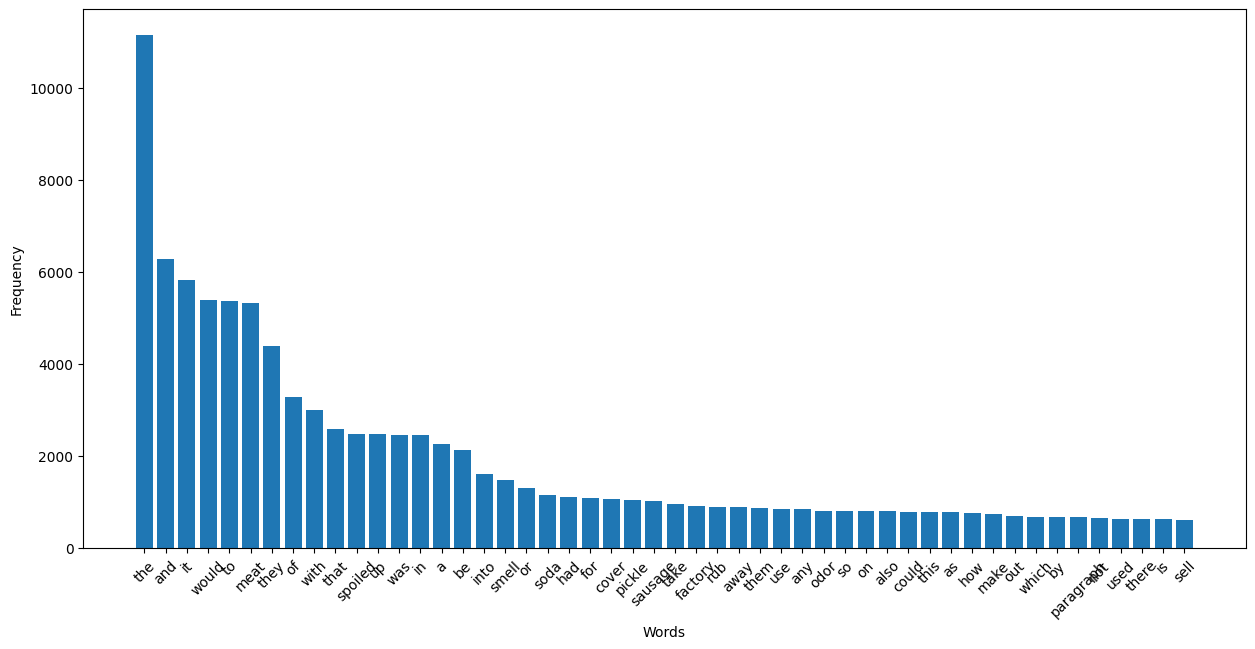

In [74]:
# Assuming 'train_data' contains the preprocessed training text in a column called 'preprocessed_text'
words = ' '.join(tester['treated_question_summaries']).split()
word_freq = Counter(words)

# Sort by frequency
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Plot
plt.figure(figsize=(15, 7))
plt.bar([x[0] for x in sorted_word_freq[:50]], [x[1] for x in sorted_word_freq[:50]])
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


In [75]:
import tensorflow as tf

def mcrmse_loss(y_true: tf.Tensor, y_pred: tf.Tensor) -> tf.Tensor:
    """
    Compute the Mean Columnwise Root Mean Squared Error (MCRMSE).
    
    Parameters:
    - y_true : tf.Tensor
        Ground truth values.
        
    - y_pred : tf.Tensor
        Predicted values.
    
    Returns:
    - mcrmse : tf.Tensor
        The computed MCRMSE value.
    """
    columnwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=0)
    columnwise_rmse = tf.sqrt(columnwise_mse)
    mcrmse = tf.reduce_mean(columnwise_rmse)
    return mcrmse

def weighted_mcrmse_loss_factory(weights):
    """
    Factory function for generating a custom loss function that combines different losses.
    
    Parameters:
    - weights: List of weights for each loss component
    
    Returns:
    - weighted_mcrmse_loss: A function for computing the weighted loss
    """
    def weighted_mcrmse_loss(y_true, y_pred):
        """
        Compute the weighted Mean Columnwise Root Mean Squared Error (MCRMSE).
        
        Parameters:
        - y_true: True labels
        - y_pred: Predicted labels
        
        Returns:
        - loss: The weighted loss
        """
        # Calculate columnwise MSE and RMSE
        columnwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=0)
        columnwise_rmse = tf.sqrt(columnwise_mse)
        
        # Apply weights to the columnwise RMSE
        weighted_rmse = tf.multiply(columnwise_rmse, weights)
        
        # Take the mean across all columns to get the final loss
        loss = tf.reduce_mean(weighted_rmse)
        
        return loss
    
    return weighted_mcrmse_loss


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="training"></a>Training</p>

In [76]:
print(f'Training Target Mean: \n {np.mean(target_labels)}')
print(f'Validation Target Mean: \n {np.mean(validation_labels)}')

Training Target Mean: 
 0.42552639544404963
Validation Target Mean: 
 0.37916114126482975


In [77]:
print(len(train_features), len(target_labels))
print(len(val_features), len(validation_labels))

5169 5169
1996 1996


In [78]:
train_features.shape

(5169, 14)

In [79]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import schedules, AdamW, RMSprop

def build_regression_model(hp):
    
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)  # number of hidden layers
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)  # neurons in each hidden layer
    l2_reg = hp.Float("l2_reg", min_value=1e-6, max_value=1e-2, sampling="log")  # L2 regularization
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")  # learning rate
    
    optimizer_choice = hp.Choice("optimizer_choice", ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam', 'Ftrl', 'L-BFGS'])
    
    # Learning rate schedulers
    lr_schedule = schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                             decay_steps=10000,
                                             decay_rate=0.9)
    
    if optimizer_choice == 'adam':
        optimizer = AdamW(learning_rate=lr_schedule)
    elif optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
    elif optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=lr_schedule)
    elif optimizer_choice == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr_schedule)
    elif optimizer_choice == 'Adadelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr_schedule)
    elif optimizer_choice == 'Nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)
    else:
        # Ftrl will be the default optimizer
        optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr_schedule)

    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), 
                                    activation='relu', input_shape=(train_features.shape[1],)))  # Assuming X_train is pre-defined
    
    dropout_rate = hp.Float("dropout_rate", min_value=0.0, max_value=0.5, step=0.05)  # dropout rate
    
    # Adding Batch Normalization and dropout for each hidden layer
    for _ in range(n_hidden):
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    
    model.add(tf.keras.layers.Dense(2))  # Output layer
    
    my_weighted_loss = weighted_mcrmse_loss_factory([.4, .6])
    
    model.compile(optimizer=optimizer, loss=my_weighted_loss)


    # Learning rate reduction callback
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)
    
    return model


In [80]:
def build_regression_model2(hp):
    n_hidden = hp.Int(
        "n_hidden", min_value=0, max_value=8, default=2
    )  # number of hidden layers

    n_neurons = hp.Int(
        "n_neurons", min_value=16, max_value=256
    )  # number of neurons in each hidden layer


    l2_reg = hp.Float("l2_reg", min_value=1e-6, max_value=1e-2, sampling="log")

    learning_rate = hp.Float(
        "learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")  # learning rate

    optimizer_choice = hp.Choice("optimizer_choice", ['adam', 'sgd', 'RMSprop', 'Adagrad', 'Adadelta', 'Nadam', 'Ftrl', 'L-BFGS'])
    
    # Learning rate schedulers
    lr_schedule = schedules.ExponentialDecay(initial_learning_rate=learning_rate,
                                             decay_steps=10000,
                                             decay_rate=0.9)
    
    if optimizer_choice == 'adam':
        optimizer = AdamW(learning_rate=lr_schedule)
    elif optimizer_choice == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
    elif optimizer_choice == 'RMSprop':
        optimizer = RMSprop(learning_rate=lr_schedule)
    elif optimizer_choice == 'Adagrad':
        optimizer = tf.keras.optimizers.Adagrad(learning_rate=lr_schedule)
    elif optimizer_choice == 'Adadelta':
        optimizer = tf.keras.optimizers.Adadelta(learning_rate=lr_schedule)
    elif optimizer_choice == 'Nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)
    elif optimizer_choice == 'Ftrl':
        optimizer = tf.keras.optimizers.Ftrl(learning_rate=lr_schedule)
    # L-BFGS is a bit different and may require separate handling, left out here for simplicity
    
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(hp.Int('input_units', min_value=32, max_value=512, step=32), 
                                    activation='relu', input_shape=(train_features.shape[1],)))

    model.add(tf.keras.layers.BatchNormalization())  # Batch Normalization

    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)))
        model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.05)))  # Dropout

    model.add(tf.keras.layers.Dense(2))  # Assuming you want to stick with a linear activation

    my_weighted_loss = weighted_mcrmse_loss_factory([0.4, 0.6])
    
    model.compile(optimizer=optimizer, loss=mcrmse_loss)    
    
    return model


In [82]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model_checkpoint = ModelCheckpoint('best_standard_model_epoch.h5', save_best_only=True, monitor='val_loss', mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

call_backs = [model_checkpoint, early_stopping]

tuner_2 = kt.BayesianOptimization(
    build_regression_model2,
    objective='val_loss',
    max_trials=8,
    num_initial_points= 2,
    seed=1,
    overwrite=True,
    directory='tuner_2',
    project_name='standard'
)

tuner_2.search(train_reg, epochs=1000, validation_data=val_reg, callbacks = call_backs)

best_standard_model = tuner_2.get_best_models(num_models=1)[0]


best_standard_model.save('best_standard_model.h5')

Trial 8 Complete [00h 00m 08s]
val_loss: 0.13879618048667908

Best val_loss So Far: 0.12588153779506683
Total elapsed time: 00h 02m 20s


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#243139; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> <a name="model-evaluation"></a>Model Evaluation</p>

In [83]:
predictions = best_standard_model.predict(val_features)
predictions = target_scaler.inverse_transform(predictions)
predictions

63/63 [==============================] - 0s 925us/step


array([[-0.8454196 , -0.89989644],
       [-0.24020514, -0.1033671 ],
       [-0.8962264 , -0.762141  ],
       ...,
       [ 0.5190189 ,  0.21151002],
       [-0.04582727,  0.12711921],
       [ 0.52879053,  0.28330225]], dtype=float32)

In [84]:
true = validation_labels
true = target_scaler.inverse_transform(true)
true

array([[-0.54830408,  0.50675535],
       [ 0.20568251,  0.38053764],
       [-0.87888858, -0.96632982],
       ...,
       [ 0.32873852, -1.05329428],
       [ 0.20568251,  0.38053764],
       [ 1.77159643,  0.54774244]])

 Mean Difference 0.008457204784438488 



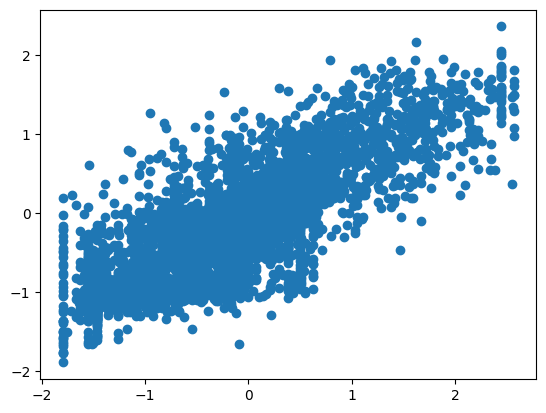

In [85]:
mean_diff = np.mean(true - predictions)
print(f' Mean Difference {mean_diff} \n')

plt.scatter(true, predictions)

In [90]:
from tensorflow.keras.models import load_model

my_weighted_loss = weighted_mcrmse_loss_factory([0.4, 0.6])

custom_objects = {
    'mcrmse_loss': mcrmse_loss,
    'weighted_mcrmse_loss': my_weighted_loss
}


# Load the model


final_model = tf.keras.models.load_model("best_standard_model.h5", custom_objects=custom_objects)

final_model.compile(optimizer='RMSprop', loss=my_weighted_loss, metrics=['mse', 'mae'])

history = final_model.fit(
    full_reg,
    batch_size=32,
    epochs=500,
    callbacks= call_backs
)


Epoch 1/500
224/224 [==============================] - 1s 2ms/step - loss: 0.0726 - mse: 0.0197 - mae: 0.1092
Epoch 2/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0725 - mse: 0.0196 - mae: 0.1089
Epoch 3/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0718 - mse: 0.0192 - mae: 0.1078
Epoch 4/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0707 - mse: 0.0186 - mae: 0.1066
Epoch 5/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0715 - mse: 0.0191 - mae: 0.1080
Epoch 6/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0710 - mse: 0.0187 - mae: 0.1073
Epoch 7/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0707 - mse: 0.0186 - mae: 0.1059
Epoch 8/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0699 - mse: 0.0182 - mae: 0.1056
Epoch 9/500
224/224 [==============================] - 0s 1ms/step - loss: 0.0701 - mse: 0.0182 - mae: 0.1056
Epoch 10/5

In [92]:
loss, mse, mae = final_model.evaluate(val_reg)


print("Loss: ", loss)
print("MSE: ", mse)
print("MAE: ", mae)


63/63 [==============================] - 0s 1ms/step - loss: 0.0470 - mse: 0.0074 - mae: 0.0665
Loss:  0.046971868723630905
MSE:  0.007375395391136408
MAE:  0.06647821515798569


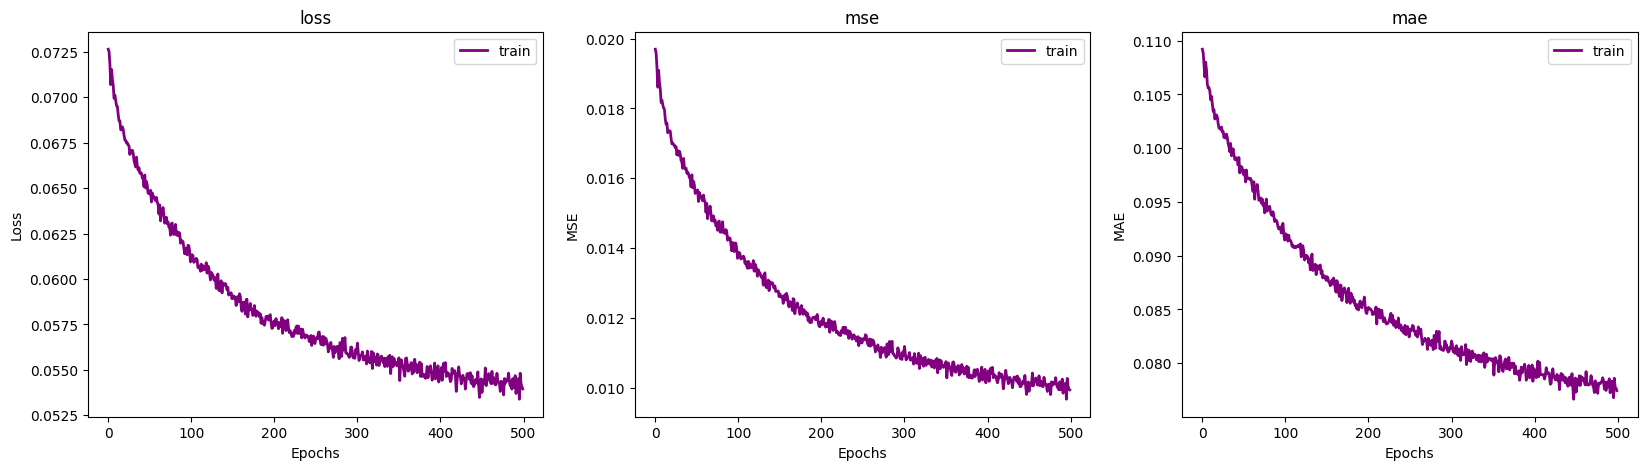

In [93]:
import matplotlib.pyplot as plt

loss = history.history['loss']
# val_loss = history.history['val_loss']
mse = history.history['mse']
# val_mse = history.history['val_mse']
mae = history.history['mae']
# val_mae = history.history['val_mae']



fig , ax = plt.subplots(1,3, figsize=(20,5))

ax[0].plot(loss, label='train', color='purple', linewidth=2.0, linestyle = '-')   # specify color and line width
ax[0].set_title('loss')
ax[0].set_xlabel('Epochs')   # set x label
ax[0].set_ylabel('Loss')   # set y label
ax[0].legend()

ax[1].plot(mse, label='train', color='purple', linewidth=2.0, linestyle = '-')   # specify color and line width
ax[1].set_title('mse')
ax[1].set_xlabel('Epochs')   # set x label
ax[1].set_ylabel('MSE')   # set y label
ax[1].legend()

ax[2].plot(mae, label='train', color='purple', linewidth=2.0, linestyle = '-')   # specify color and line width
ax[2].set_title('mae')
ax[2].set_xlabel('Epochs')   # set x label
ax[2].set_ylabel('MAE')   # set y label
ax[2].legend()

plt.show()

63/63 [==============================] - 0s 1ms/step
 Mean Difference 0.036552422617745994 



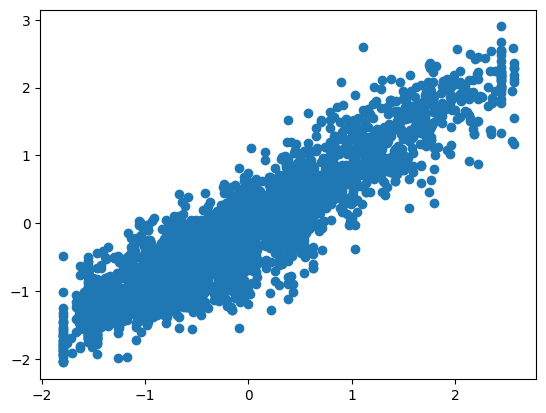

In [94]:
predictions = final_model.predict(val_features)
predictions = target_scaler.inverse_transform(predictions)

true = validation_labels
true = target_scaler.inverse_transform(true)

mean_diff = np.mean(true - predictions)
print(f' Mean Difference {mean_diff} \n')

plt.scatter(true, predictions)